# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [ ]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')
#demiliter informadopara usar ';' aprensentou uma falha na leitura do arquivo utilizado delimiter=',' para o arquivo.

df.head(10)

Index(['title', 'Marca', 'Preco_Normal', 'Preco_Desconto', 'Preco_Anterior',
       'Desconto', 'Categoria'],
      dtype='object')


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

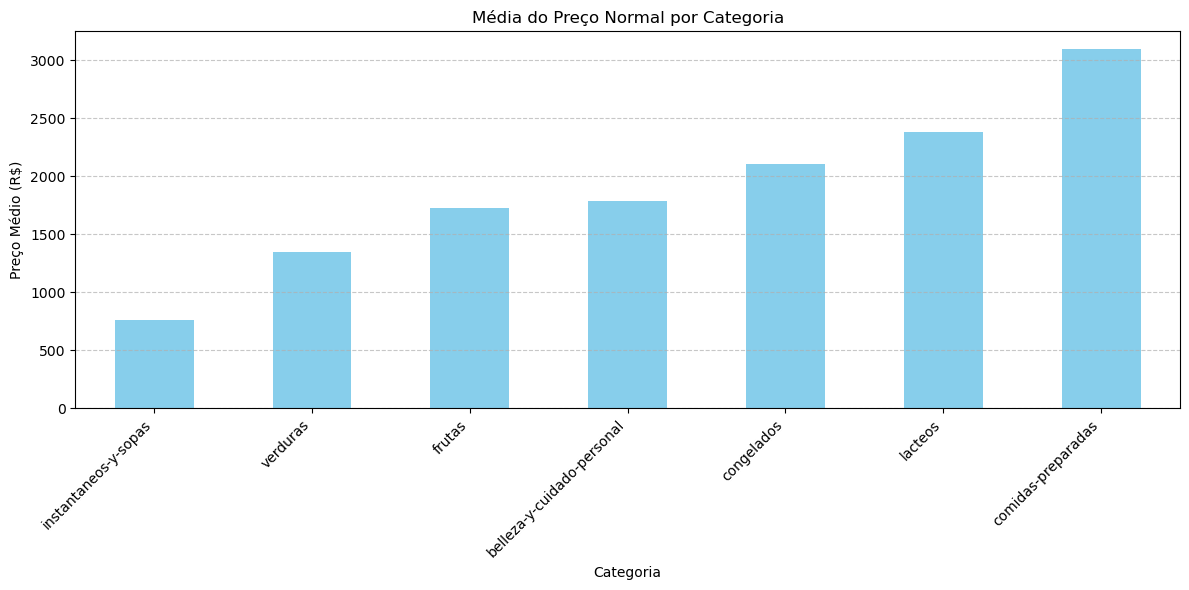

In [8]:
# Calcular a media do preço normal por categoria
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().sort_values()

plt.figure(figsize=(12, 6))
media_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Média do Preço Normal por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

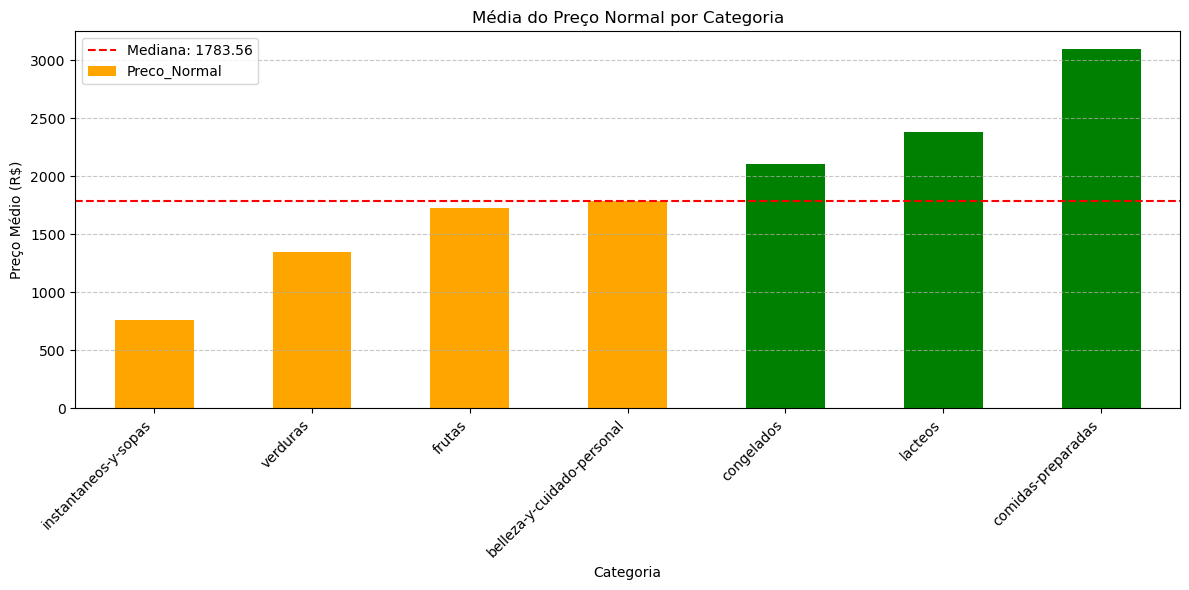

In [9]:
# Calcular a mediana
mediana_geral = media_por_categoria.median()

# Cores diferentes para categorias acima e abaixo da mediana
cores = ['green' if valor > mediana_geral else 'orange' for valor in media_por_categoria]

# Gráfico com linha da mediana e cores personalizadas
plt.figure(figsize=(12, 6))
media_por_categoria.plot(kind='bar', color=cores)
plt.axhline(y=mediana_geral, color='red', linestyle='--', label=f'Mediana: {mediana_geral:.2f}')
plt.title('Média do Preço Normal por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Digite aqui as categorias: 
Abaixo: Instantaneos-y-sopas, verduras, frutas, belleza-y-cuidado-personal
Acima : congelados, lacteos, comidas-preparadas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

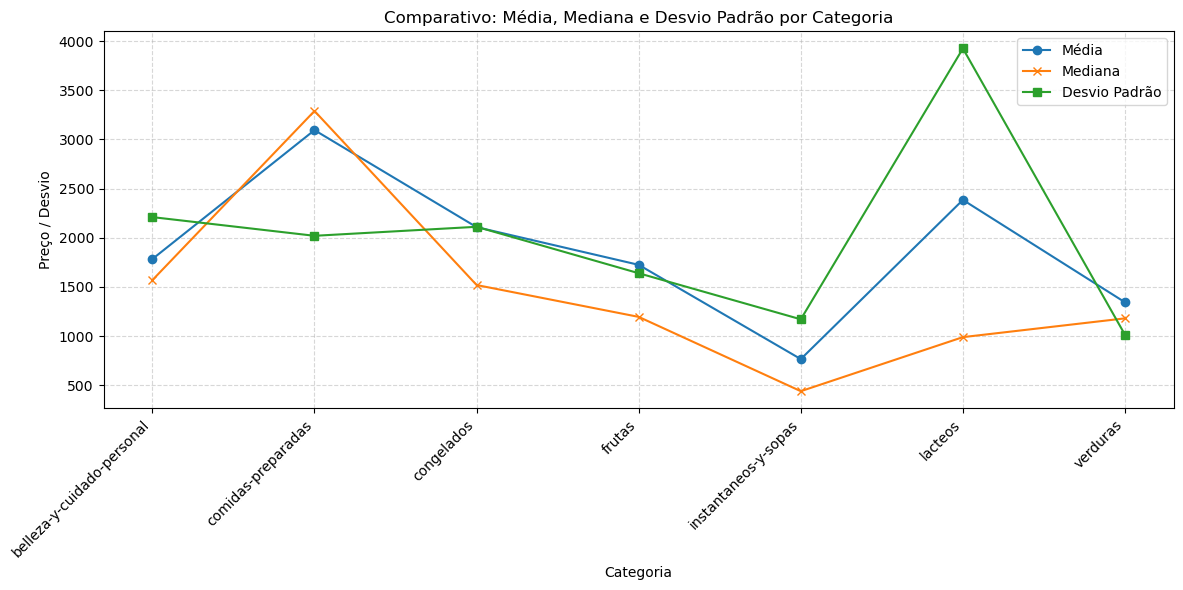

In [ ]:
# Agrupar por categoria: média, mediana e desvio padrão
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()
desvio_por_categoria = df.groupby('Categoria')['Preco_Normal'].std()

# Ordenar pelo desvio padrão para visualização
desvio_ordenado = desvio_por_categoria.sort_values()

# Plotar gráfico de barras do desvio padrão
plt.figure(figsize=(12, 6))
media_por_categoria.sort_index().plot(label='Média', marker='o')
mediana_por_categoria.sort_index().plot(label='Mediana', marker='x')
desvio_por_categoria.sort_index().plot(label='Desvio Padrão', marker='s')
plt.title('Comparativo: Média, Mediana e Desvio Padrão por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço / Desvio')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Digite nesse campo o comportamento que você identificou.

Podemos indentificar que o banco de dados oferecido deve ter algum outliers com algumas valores muito acima do normal, como não foi solicitado para tratalos ele puxar o grafico muito acima.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

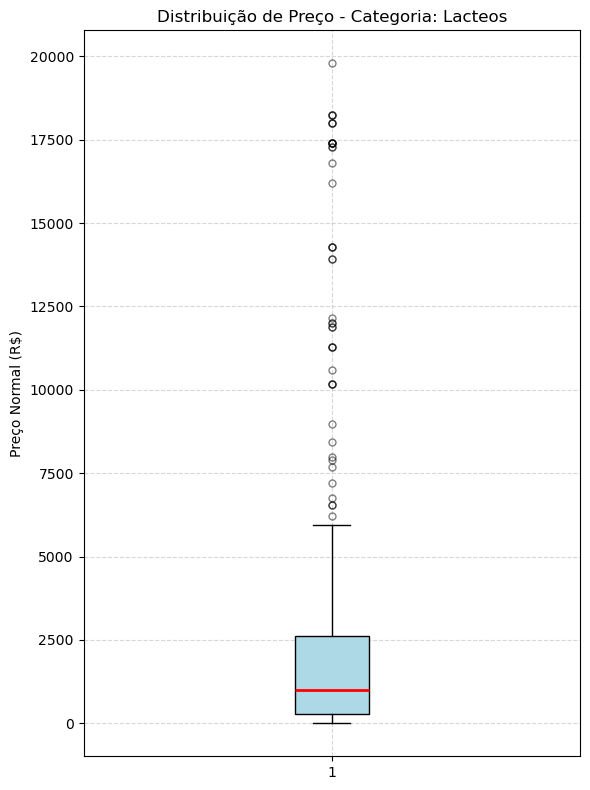

In [ ]:
# Filtrar apenas os produtos da categoria "lacteos"
df_lacteos = df[df['Categoria'].str.lower() == 'lacteos']

plt.figure(figsize=(6, 8))
plt.boxplot(df_lacteos['Preco_Normal'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', color='black', markersize=5, alpha=0.5))

plt.title('Distribuição de Preço - Categoria: Lacteos')
plt.ylabel('Preço Normal (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

No grafico gerado tem muitos outliers com valores muito acima, assim puxando a media e mediana muito acima 

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

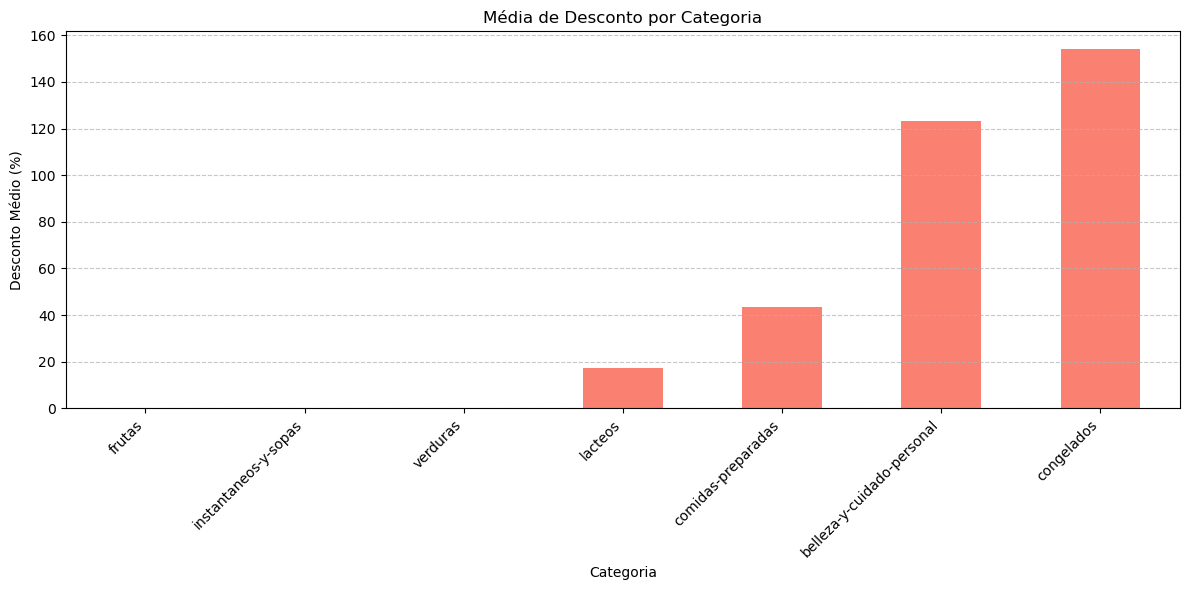

In [ ]:
# Calcular a média do desconto por categoria
media_desconto = df.groupby('Categoria')['Desconto'].mean().sort_values()

plt.figure(figsize=(12, 6))
media_desconto.plot(kind='bar', color='salmon')
plt.title('Média de Desconto por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Desconto Médio (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [ ]:
df_grouped = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Filtrar apenas produtos com desconto > 0
df_desconto = df[df['Desconto'] > 0]

# Agrupar por Categoria e Marca, calculando a média de desconto
df_grouped = df_desconto.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criar o treemap com Plotly
fig = px.treemap(
    df_grouped,
    path=['Categoria', 'Marca'],     # Hierarquia: Categoria > Marca
    values='Desconto',               # Tamanho baseado na média de desconto
    color='Desconto',                # Cor baseada no valor do desconto
    color_continuous_scale='RdYlGn_r',  # Escala de cores invertida (maior desconto = vermelho)
    title='Mapa Interativo da Média de Desconto (> 0) por Categoria e Marca'
)

fig.show()